# [CptS 215 Introduction to Algorithmic Problem Solving](http://piazza.com/wsu/fall2017/cpts215/home)
[Washington State University](https://wsu.edu)

[Gina Sprint](http://eecs.wsu.edu/~gsprint/)
## PA6 Graph Mining (100 pts)
<mark>Due: </mark>

### Learner Objectives
At the conclusion of this programming assignment, participants should be able to:
* Implement breadth first search for graphs
* Visualize graph structures
* Compute graph statistics

### Prerequisites
Before starting this programming assignment, participants should be able to:
* Write object-oriented code in Python
* Implement a graph ADT and common graph algorithms
* Write Markdown and code cells in Jupyter Notebook
* Create plots with `matplotlib`

### Acknowledgments
Content used in this assignment is based upon information in the following sources:
* [Kevin Bacon number assignment from Dartmouth](http://www.cs.dartmouth.edu/~cbk/classes/10/14winter/hws.php?hw=PS-5)

## Overview and Requirements
For this programming assignment, we are going to tackle the important social network problem of finding an actor's ["Bacon number"](https://simple.wikipedia.org/wiki/Bacon_number): starting with an actor, see if they have been in a movie with someone who has been in a movie with someone who has been in a movie ... who has been in a movie with [Kevin Bacon](https://en.wikipedia.org/wiki/Kevin_Bacon). They're usually at most 6 steps away. 

There are plenty of other 6-degrees-of-separation phenomena in social networks. In a geekier version, the center of the universe is [Paul Erdos](https://en.wikipedia.org/wiki/Paul_Erd%C5%91s), a prolific author and coauthor, and people are characterized by their [Erdos numbers](https://en.wikipedia.org/wiki/Erd%C5%91s_number). The highest known finite Erdos number is 13. Remarkably, there are a number of people who have both small Erdos numbers and small Bacon numbers (number = steps away):
* [Dan Kleitman](https://en.wikipedia.org/wiki/Daniel_Kleitman) has total Erdos-Bacon number of 3 (Erdos 1, Bacon 2), but the Bacon number is due to a role as an extra. 
* [Danica McKellar](https://en.wikipedia.org/wiki/Danica_McKellar) has an Erdos-Bacon number of 6, and is both a professional actress (The Wonder Years and West Wing) and wrote a published math paper as well as supplemental math texts designed for teenage girls (Math Doesn't Suck, Kiss My Math, and Hot X: Algebra Exposed).

Note: for this assignment, code one Jupyter Notebook that tells the story of your data science endeavor. All auxiliary code (e.g. graph classes and functions) are to be in separate .py files and are imported into the notebook.

### Program Details
In this problem you will write a program to play the Kevin Bacon game. The vertices in this network graph are actors and the edge relationship is "appeared together in a movie". The goal is to find the shortest path between two actors. Traditionally the goal is to find the shortest path to Kevin Bacon. The following output from the sample solution shows how the game is played:

```
To quit the program, type return in answer to a question.
Enter the name of an actor: Diane Keaton
Diane Keaton's number is 2
Diane Keaton appeared in Hanging Up (2000) with Meg Ryan
Meg Ryan appeared in In the Cut (2003) with Kevin Bacon

Enter the name of an actor: Buster Keaton
Buster Keaton's number is 5
Buster Keaton appeared in Limelight (1952) with Claire Bloom
Claire Bloom appeared in Haunting, The (1963) with Julie Harris
Julie Harris appeared in Requiem for a Heavyweight (1962) with Mickey Rooney
Mickey Rooney appeared in Erik the Viking (1989) with Tim Robbins
Tim Robbins appeared in Mystic River (2003) with Kevin Bacon

Enter the name of an actor: 
```

So based on the data set we supply for this problem, Diane Keaton's Bacon Number is two, and Buster Keaton's Bacon Number is five.

#### Shortest Path Computation
The easiest way to play the Kevin Bacon game is to do what is called breadth-first search (BFS) in the movie data graph. This builds a tree of shortest paths from every actor who can reach Kevin Bacon back to Kevin Bacon. Or more generally, given a root BFS builds a shortest-path tree from every vertex that can reach the root back to the root. It is a tree where every vertex points to its parent, and the parent is the next vertex in a shortest path to the root.

Note: In class, we implemented a BFS to print out vertices in the graph. This BFS does not build a shortest-path tree. Later, we will implement Dijkstra's algorithm for a *weighted* graph. Dijkstra's algorithm does build a shortest-path tree. For this assignment, our graph structure is *unweighted*, so we can use either a BFS generated shortest-path tree or a modified version of Dijkstra's algorithm to generate the tree.

To implement BFS we use a queue. We also need a graph, which is to be represented using your own implementation of a `Graph` class (see the lesson notes for how to do this). The result of our BFS is the shortest-path tree described above. 

The pseudocode describing BFS is:

```
insert root into an empty queue Q and into a new directed graph T

until Q is empty
  dequeue Q to get next vertex v to process
    for each edge e that is incident to v in G
      let v' be the other end of the edge
      if v' is not in T
        add v' to T and add an edge with the same label as e from v' to v in T
        enqueue v' in Q
return T
```

When you are done, `T` holds a shortest-path or BFS tree. To find the Bacon number of an actor, look the actor up in `T`. If there is no vertex for that actor in `T`, then the actor is not connected to the root. If the actor is there, follow edges of `T` back to the root, printing movies (edge labels) and actors (vertices) along the way.


#### Dataset
Download [bacon.zip](https://raw.githubusercontent.com/gsprint23/cpts215/master/progassignments/files/cancer.csv) (thanks to Brad Miller at Luther College) and construct a graph from the datasets contained within the zip file. The three main files, actors.txt, movies.txt, and movie-actors.txt are large: 9,235 actors, 7,067 movies, and 21,370 movie-actor pairs, resulting in 32,337 edges. 

Note: while you are developing your program use smaller versions actorsTest.txt, moviesTest.txt, movie-actorsTest.txt, whose data represent the graph:

```
vertices:
  "Kevin Bacon", "actor1", "actor2", "actor3", "actor4", "actor5", "actor6"]
  
edges:
  ("Kevin Bacon", "actor1", "movie1")
  ("Kevin Bacon", "actor2", "movie1")
  ("actor1", "actor2", "movie1") 
  ("actor1", "actor3", "movie2") 
  ("actor3", "actor2", "movie3") 
  ("actor3", "actor4", "movie4")
  ("actor5", "actor6", "movie5")
```

The files are all formatted the same way. Each line has two quantities separated by a "|". In the actors file the quantities are actorID and actorName. In the movies file they are movieID and movieName. In the movies-actors file they are movieID and actorID, indicating that the actor associated with actorID appeared in the movie associated with movieID.

Use the file contents to build a graph whose vertices are labeled with actor names (not IDs). Create an edge between two actors if they appeared in the same movie, and label that edge with the name of that movie. You should assume that no movie appears twice in the movies file and that no actor appears twice in the actors file. It is OK for there to be multiple edges between a pair of actors if they appeared together in multiple movies. You may find it useful to create maps (e.g. dictionaries) for mapping IDs to actor names and IDs to movie names. You can also use a map to figure out which actors appeared in each movie, and can use that information to add the appropriate edges to the graph. This may take a little thought, but try it by hand on the small data set given above.

Note: When opening these files, you may need to specify the encoding so Python doesn't crash: `open(r"actors.txt", "r", encoding="latin-1")`

#### Bacon Game
Implement the Bacon game. Perform BFS on the graph with "Kevin Bacon" as root and hold onto the BFS tree returned. Then ask for a series of actors. For each one, print out the path between that actor and the source, or say that none exists. This will require following a path from the chosen actor in the BFS tree back to the root (see above for an example of how this might be formatted). If the user gives a name that is not in the original graph (not the tree) say so and prompt again.

Test your program on the movieTest.txt, actorTest.txt, and movie-actorTest.txt files. Make sure to demonstrate that your program works for boundary conditions. When you are sure that your program works on the test data, change it to use the movie.txt, actor.txt, and movie-actor.txt files. Demonstrate that your program works for these as well.

#### Path Visualization
Using a python library for visualization (such as `networkx`), visualize the path from the user-specified actor to Kevin Bacon. The vertices in the graph should be labeled with the actor's name and the edges should be labeled with the movie name. For example, a path from Owen Wilson to Kevin Bacon: 

<img src="https://raw.githubusercontent.com/gsprint23/cpts215/master/progassignments/figures/bacon_path.png" width="400">

#### Additional Functionality
Compute *at least two* interesting statistics about this graph. Some possible examples: 
* Find an actor with the largest finite Bacon number for this data set. 
* Find the average Bacon number for those actors with finite Bacon numbers. 
* Find the destination actor that minimizes either longest path length or average path length from all other actors.

## Bonus (5 pts)
This movie data is a bit out of date now. Find a newer or more comprehensive dataset (perhaps by way of querying some web service). Or do a six-degree-of-separation game with a different social network.

## Submitting Assignments
1.	Use the Blackboard tool https://learn.wsu.edu to submit your assignment. You will submit your code to the corresponding programming assignment under the "Content" tab. You must upload your solutions as `<your last name>_pa6.zip` by the due date and time.
2.	Your .zip file should contain your .ipynb file, .py files (graph class code), and your .txt files used to test your program.

## Grading Guidelines
This assignment is worth 100 points + 5 points bonus. Your assignment will be evaluated based on a successful compilation and adherence to the program requirements. We will grade according to the following criteria:
* 5 pts for correctly reading in the data files
* 5 pts for correctly cross-indexing IDs to names
* 15 pts for correctly using your own `Graph` class and object to store the network
* 10 pts for correctly looping over queue to visit nodes in BFS
* 10 pts for correctly maintaining the shortest path tree in BFS
* 10 pts for correct text-based path trace from actor back to Kevin Bacon
* 15 pts for correctly visualizing the path trace from user-specified actor back to Kevin Bacon
* 5 pts for implementing an interactive interface (read names, print results)
* 10 pts for correctly computing at least two interesting statistics about the graph network
* 5	for correctly handling boundary cases
* 5 pts for class and function design
* 5 pts for adherence to proper programming style and comments established for the class

# Actual game code and interaction:

None
Kevin Bacon game Or type "exit" to exit the program.
Average bacon number is: 3.6623190995175987
Roger Wilson has largest bacon number of: 8
Actors/actress with bacon number of 1: ['Jim Cummings', 'Bob Hoskins', 'Tom Hanks', 'Bill Paxton', 'Gary Oldman', 'Christian Slater', 'Joseph Mazzello', 'David Strathairn', 'Stephanie Sawyer', 'Charles Gitonga Maina', 'Winston Ntshona', 'Billy Crudup', 'Robert De Niro', 'Jay Mohr', 'Jennifer Aniston', 'Brad Renfro', 'Maximilian Schell', 'Matt Dillon', 'Neve Campbell', 'Mary Stuart Masterson', 'Marian Seldes', 'Tom Cruise', 'Jack Nicholson', 'Zachary David Cope', 'Illeana Douglas', 'John Malkovich', 'Joe Mantegna', 'Kevin Costner', 'Tommy Lee Jones', 'Steve Guttenberg', 'Mickey Rourke', 'William Baldwin', 'Kiefer Sutherland', 'John Lithgow', 'Lori Singer', 'Josh Brolin', 'Kim Dickens', 'William Windom', 'Alec Baldwin', 'Emily Longstreth', 'J.T. Walsh', 'K.C. Martel', 'Jonathan Ward', 'Stuart Townsend', 'Charlize Theron', 'Rudy Ramos', 'Jami Ge

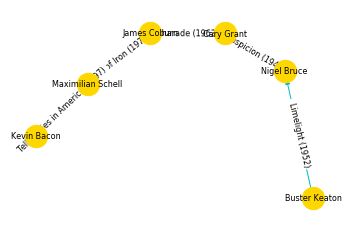

Enter the name of an actor(or exit): exit


In [2]:
from graph import Graph
import networkx as nx
import matplotlib.pyplot as plt
import re
%matplotlib inline 

def main():        
    # test out the Graph class by making the example graph we have been using (vertices 1,...,6)
    # weights are set to dummy values
    g = Graph()
    actors = {}
    movies = {}
    movie_actor = {} 
    f = open("actors_no_diacritic.txt", "r")
    for line in f:
        words = line.strip("\n").split("|")
        actors[words[0]] = words[1]
    f.close()
    f = open("movies_no_diacritic.txt", "r")
    for line in f:
        words = line.strip("\n").split("|")
        movies[words[0]] = words[1]
    f.close()
    f = open("m-a_no_diacritic.txt", "r")
    for line in f:
        words = line.strip("\n").split("|")
        m = movie_actor.get(movies[words[0]])
        if m is None:
            movie_actor[movies[words[0]]] = [actors[words[1]]]
        else:
            m.append(actors[words[1]])
            movie_actor[movies[words[0]]] = m
    f.close()

    # Cleaning unused dictionaries.
    del(actors)
    del(movies)

    for m, a in movie_actor.items():
        x = 0
        while x < len(a):
            y = x + 1
            while y < len(a) - 1:
                g.add_edge(a[x], a[y], m)
                g.add_edge(a[y], a[x], m)
                y += 1
            x += 1
    del(movie_actor)
    new_g = g.bfs(g, g.get_vertex("Kevin Bacon"))
    del(g)
    print(new_g.get_vertex("Jerry Smith"))

    inp = ""
    print("Kevin Bacon game Or type \"exit\" to exit the program.")
    
    bacon_average = 0 # Average bacon number.
    largest_b =  [None, 0] # Largest bacon number, list of Name, number.
    lowest_b = [] # List of actor's/acresses with bacon number of 1.
    for v in new_g.get_vertices():
        end = False
        bacon_n = 0
        name = v
        while not end:
            new_vertext = new_g.get_vertex(v)
            if new_vertext is None or new_vertext.ID == "Kevin Bacon":
                end = True
                bacon_average += bacon_n
                if bacon_n == 1:
                    lowest_b.append(name)
                break
            other_end_actor = ""
            for f, g in new_vertext.connected_to.items(): # Unfortunately I could not find a way to just get one single element by index from python dictionary
                other_end_actor = f.ID
                break
            bacon_n += 1
            if bacon_n > largest_b[1]:
                largest_b = [name, bacon_n]
            v = other_end_actor
    bacon_average /= len(new_g.vert_list)

    print("Average bacon number is: " + str(bacon_average))
    print("{} has largest bacon number of: {}".format(largest_b[0], largest_b[1]))
    print("Actors/actress with bacon number of 1: {}\n".format(lowest_b))

    while inp != "exit":
        G = nx.DiGraph()
        bacon_number = 0
        end = False
        out_put = ""
        inp = input("Enter the name of an actor(or exit): ")
        name = inp
        if inp == "exit":
            break
        while not end:
            new_vertext = new_g.get_vertex(inp)
            if new_vertext is None or new_vertext.ID == "Kevin Bacon":
                end = True
                break
            bacon_number += 1
            other_end_actor, other_end_name = "", ""
            for f, g in new_vertext.connected_to.items(): # Unfortunately I could not find a way to just get one single element by index from python dictionary
                other_end_actor = f.ID
                other_end_name = g
                break
            G.add_edge(new_vertext.ID, other_end_actor, label=other_end_name)
            out_put += "{} appeared in {} with {}\n".format(new_vertext.ID, other_end_name, other_end_actor)
            inp = other_end_actor
        print("{}'s bacon number is {}".format(name, bacon_number))
        print(out_put)
        elabels = {edge:G[edge[0]][edge[1]]["label"] for i, edge in enumerate(G.edges())}
        pos = nx.spring_layout(G)
        nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), node_color='gold', node_size = 500)
        nx.draw_networkx_labels(G, pos, font_size=8)
        nx.draw_networkx_edge_labels(G, pos, edge_labels=elabels, font_size=8)
        nx.draw_networkx_edges(G, pos, edge_color='c', arrows=True)
        plt.axis('off')
        plt.autoscale(enable=True, tight=False)
        plt.show()


if __name__ == "__main__":
    main()